<a href="https://colab.research.google.com/github/julianamo93/CoffeeShop-AnaliseDeDados/blob/main/checkpoint01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CheckPoint 01 - IA & ChatBot**
## **Integrantes:**
*   Juliana Moreira - RM: 554113
*   Kevin Nobre - RM: 552590
*   Sabrina Couto - RM: 552728




# **Coffee Shop Sales Analysis**

**Sobre o Dataset**
*   Origem - Kaggle (https://www.kaggle.com/datasets/divu2001/coffee-shop-sales-analysis/data)
*   Nome: Coffee Shop Analysis (Análise de Vendas de Cafeterias)
*   Tamanho: 18.4 MB
*   Quantidade de Registros:
*   Este dataset contém dados sobre as vendas de uma cafeteria.
*   Ele contém o ID de transação de cada cliente e a descrição do pedido.
*   Não contém nenhum valor nulo.




#**Overview do Dataset**

Primeiro, vamos fazer um overview de todo o dataset, examinando suas dimensões, visualizando os dados em cada coluna e checando os possíveis valores perdidos.

In [29]:
import pandas as pd # trabalho com dados tabulares
import numpy as np
import seaborn as sns # visualização de dados
import matplotlib.pyplot as plt # criação de gráficos

df = pd.read_csv("CoffeeshopData/Project.csv")

df.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


# **Informações Básicas**

Primeiro, antes das análises estatísticas, iremos realizar uma análise básica das informações do conjunto de dados, para compreender a estrutura, os tipos de dados presentes e se há algum problema na integridade dos dados, como valores ausentes. Esta etapa será fundamental para prepararmos os dados para análises mais avançadas e garantir que os resultados obtidos sejam confiáveis e significativos.

*   Dimensões: número de linhas e colunas
*   Tipos de Dados: tipo de dado em cada coluna
*   Valores ausentes: verificação de dados faltantes

In [30]:
dataset_info = {
    "Numero de Linhas": df.shape[0], # verificação do número de linhas
    "Numero de Colunas": df.shape[1], # verificação do número de colunas
    "Nomes de Coluna": df.columns.tolist(), # verificação dos nomes de colunas
    "Tipos de Dados": df.dtypes, # tipos de dados no df
    "Valores Ausentes": df.isnull().sum() # valores nulos
}

dataset_info

{'Numero de Linhas': 149116,
 'Numero de Colunas': 18,
 'Nomes de Coluna': ['transaction_id',
  'transaction_date',
  'transaction_time',
  'store_id',
  'store_location',
  'product_id',
  'transaction_qty',
  'unit_price',
  'Total_Bill',
  'product_category',
  'product_type',
  'product_detail',
  'Size',
  'Month Name',
  'Day Name',
  'Hour',
  'Month',
  'Day of Week'],
 'Tipos de Dados': transaction_id        int64
 transaction_date     object
 transaction_time     object
 store_id              int64
 store_location       object
 product_id            int64
 transaction_qty       int64
 unit_price          float64
 Total_Bill          float64
 product_category     object
 product_type         object
 product_detail       object
 Size                 object
 Month Name           object
 Day Name             object
 Hour                  int64
 Month                 int64
 Day of Week           int64
 dtype: object,
 'Valores Ausentes': transaction_id      0
 transaction_date    

# **Estatísticas Descritivas**

Utilizando as funções para descrever as variáveis numéricas do conjunto de dados do dataset.



In [31]:
numerical_stats = df.describe()
numerical_stats

,transaction_id,store_id,product_id,transaction_qty,unit_price,Total_Bill,Hour,Month,Day of Week
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,5.342063,47.918607,1.438276,3.382219,4.686367,11.735790,3.988881,2.982336
std,43153.600016,2.074241,17.930020,0.542509,2.658723,4.227099,3.764662,1.673091,1.996650
min,1.000000,3.000000,1.000000,1.000000,0.800000,0.800000,6.000000,1.000000,0.000000
25%,37335.750000,3.000000,33.000000,1.000000,2.500000,3.000000,9.000000,3.000000,1.000000
50%,74727.500000,5.000000,47.000000,1.000000,3.000000,3.750000,11.000000,4.000000,3.000000
75%,112094.250000,8.000000,60.000000,2.000000,3.750000,6.000000,15.000000,5.000000,5.000000
max,149456.000000,8.000000,87.000000,8.000000,45.000000,360.000000,20.000000,6.000000,6.000000


In [32]:
# Extraindo as estatísticas de interesse
media = numerical_stats.loc['mean']
mediana = numerical_stats.loc['50%'] # mediana
variancia = numerical_stats.loc['std'] ** 2 # desvio padrão
desvio_padrao = numerical_stats.loc['std']

# visualizando as estatísticas
print("Média:")
print(media)
print("\nMediana:")
print(mediana)
print("\nVariância:")
print(variancia)
print("\nDesvio Padrão:")
print(desvio_padrao)

Média:
transaction_id     74737.371872
store_id               5.342063
product_id            47.918607
transaction_qty        1.438276
unit_price             3.382219
Total_Bill             4.686367
Hour                  11.735790
Month                  3.988881
Day of Week            2.982336
Name: mean, dtype: float64

Mediana:
transaction_id     74727.50
store_id               5.00
product_id            47.00
transaction_qty        1.00
unit_price             3.00
Total_Bill             3.75
Hour                  11.00
Month                  4.00
Day of Week            3.00
Name: 50%, dtype: float64

Variância:
transaction_id     1.862233e+09
store_id           4.302474e+00
product_id         3.214856e+02
transaction_qty    2.943158e-01
unit_price         7.068806e+00
Total_Bill         1.786837e+01
Hour               1.417268e+01
Month              2.799233e+00
Day of Week        3.986611e+00
Name: std, dtype: float64

Desvio Padrão:
transaction_id     43153.600016
store_id        

In [33]:
# Contagem de valores únicos e exemplos para colunas categóricas

categorical_columns = df.select_dtypes(include=['object']).columns # selecionando colunas categóricas no df
categorical_stats = {
    column: {
        'Contagem Única': df[column].nunique(), # contagem de valores únicos
        'Exemplos': df[column].unique()[:5] # Exemplos dos valores únicos
    }
    for column in categorical_columns # loop sobre cada coluna categórica
}

categorical_stats # mostrando as estatísticas categóricas


{'transaction_date': {'Contagem Única': 181,
  'Exemplos': array(['01-06-2023', '02-06-2023', '03-06-2023', '04-06-2023',
         '05-06-2023'], dtype=object)},
 'transaction_time': {'Contagem Única': 25762,
  'Exemplos': array(['11:33:29', '11:18:24', '12:02:45', '19:39:47', '12:24:57'],
        dtype=object)},
 'store_location': {'Contagem Única': 3,
  'Exemplos': array(['Astoria', 'Lower Manhattan', "Hell's Kitchen"], dtype=object)},
 'product_category': {'Contagem Única': 9,
  'Exemplos': array(['Tea', 'Coffee', 'Bakery', 'Drinking Chocolate', 'Flavours'],
        dtype=object)},
 'product_type': {'Contagem Única': 29,
  'Exemplos': array(['Brewed herbal tea', 'Brewed Black tea', 'Brewed Green tea',
         'Brewed Chai tea', 'Drip coffee'], dtype=object)},
 'product_detail': {'Contagem Única': 45,
  'Exemplos': array(['Peppermint', 'Lemon Grass', 'Earl Grey', 'English Breakfast',
         'Serenity Green Tea'], dtype=object)},
 'Size': {'Contagem Única': 4,
  'Exemplos': array([

# **Limpeza e Preparação de Dados**

*   Limpando e preparando os dados para criar os insights.

In [34]:
# Convertendo 'transaction_date' e 'transaction_time' para formato datetime

# Convertendo a coluna 'transaction_date' para o formato datetime usando pd.to_datetime()
# O argumento 'format' especifica o formato da data na coluna, '%d-%m-%Y' representa dia-mês-ano
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d-%m-%Y')

# Convertendo a coluna 'transaction_time' para o formato timedelta usando pd.to_timedelta()
# Isso permite manipular valores de tempo de forma mais conveniente
df['transaction_time'] = pd.to_timedelta(df['transaction_time'])

# Verificando a conversão
# Exibindo as primeiras linhas das colunas 'transaction_date' e 'transaction_time' para garantir que a conversão ocorreu corretamente
df[['transaction_date', 'transaction_time']].head()

,transaction_date,transaction_time
0,2023-06-01,0 days 11:33:29
1,2023-06-02,0 days 11:18:24
2,2023-06-02,0 days 12:02:45
3,2023-06-02,0 days 19:39:47
4,2023-06-03,0 days 12:24:57


# **Criando Visualizações das Análises Realizadas**

Aqui, estaremos utilizando as bibliotecas Matplotlib e Seaborn para criar visualizações das análises realizadas. Realizamos uma análise completa de todos os dados, adicionando gráficos completos sobre cada coluna analisada para criar uma visualização geral dos dados coletados.

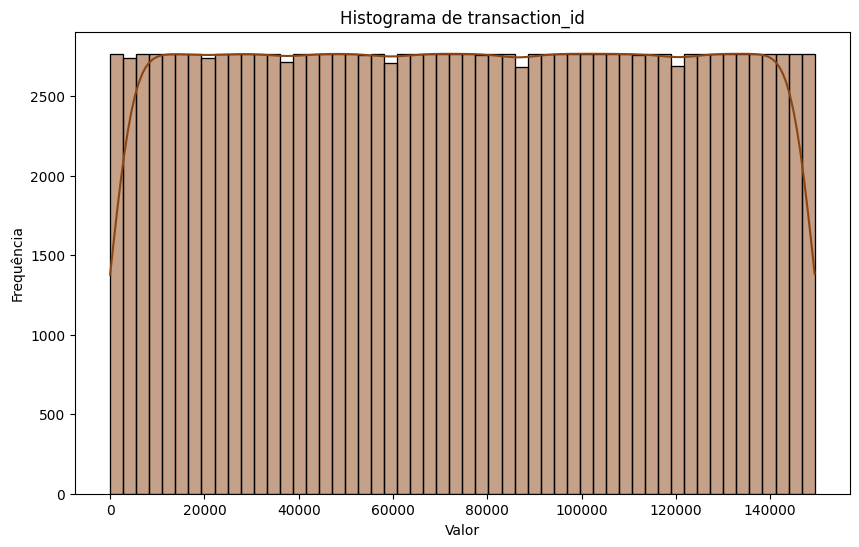

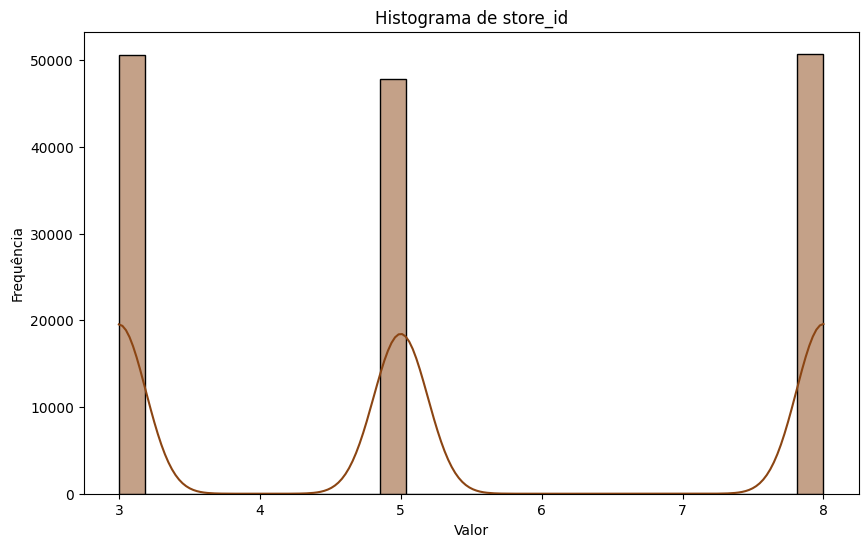

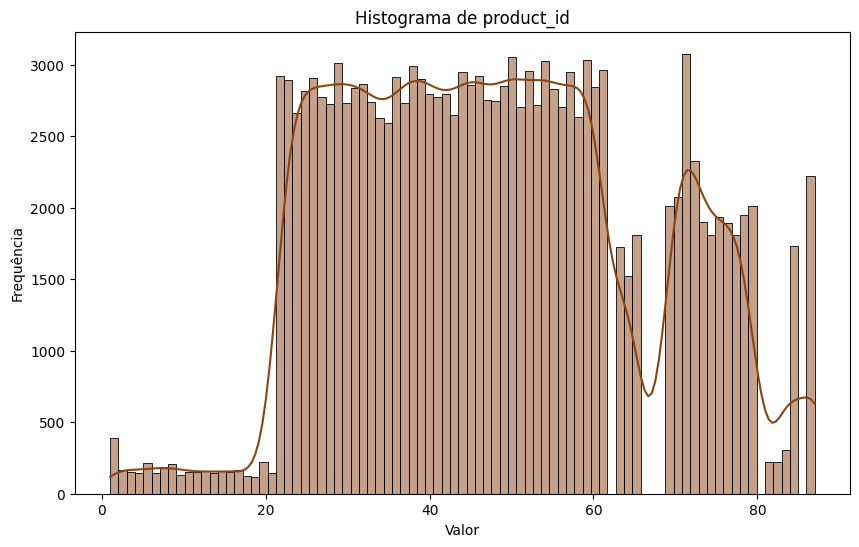

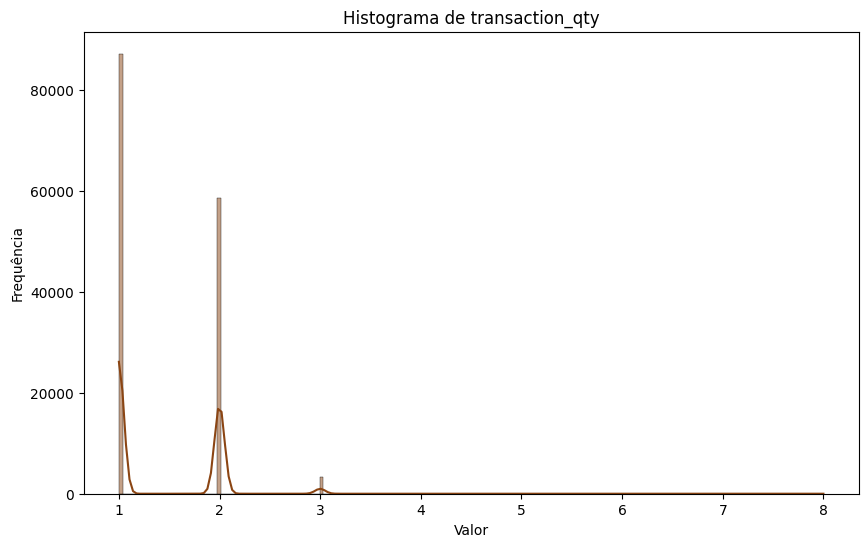

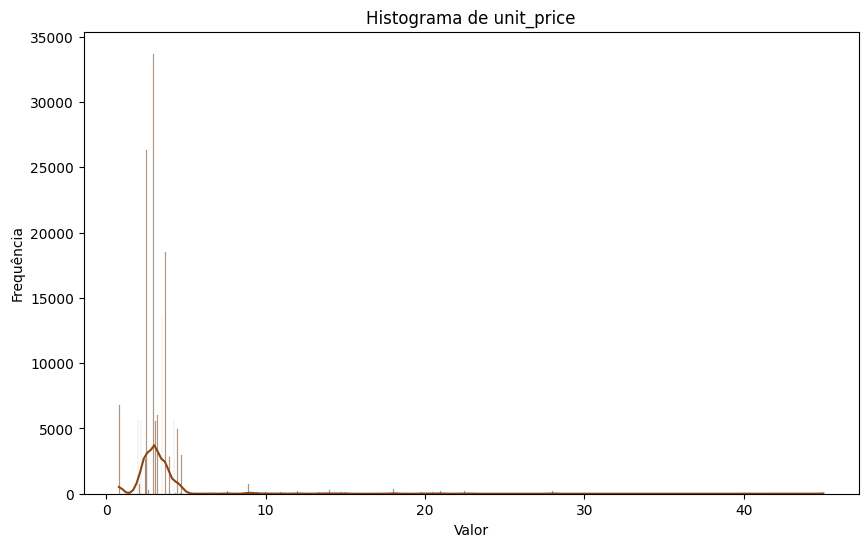

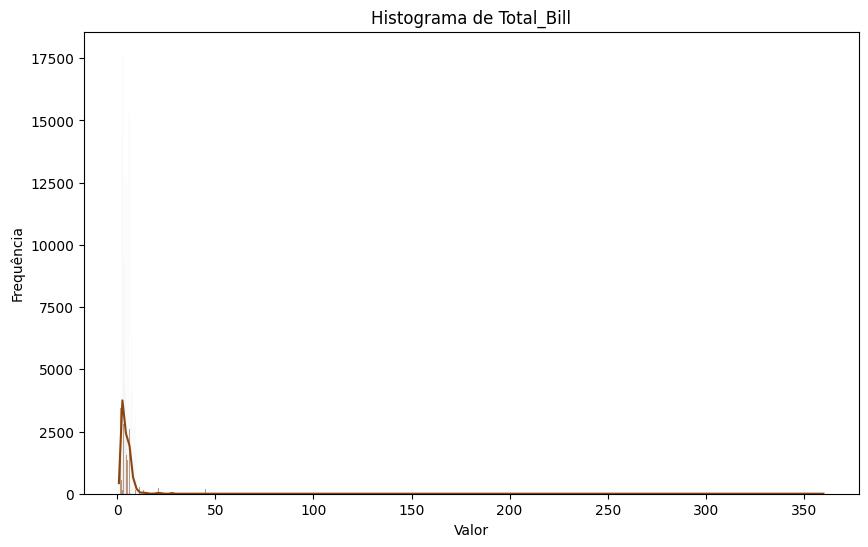

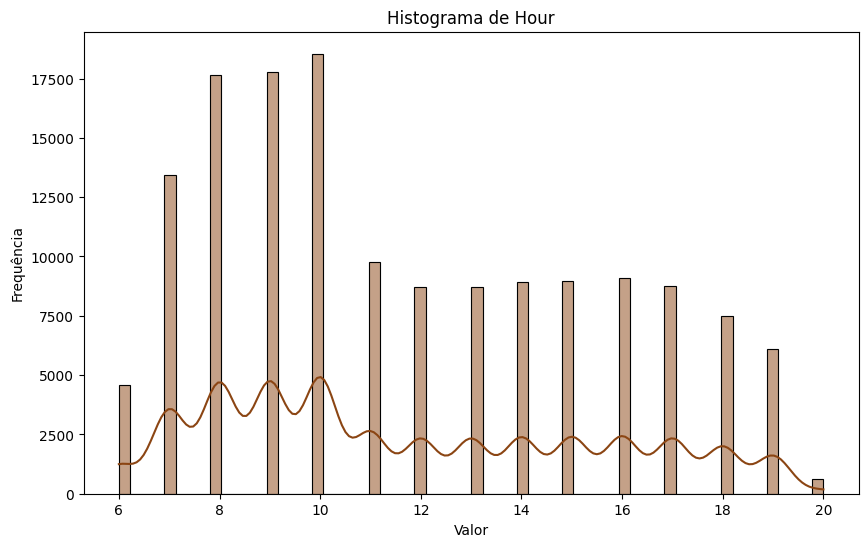

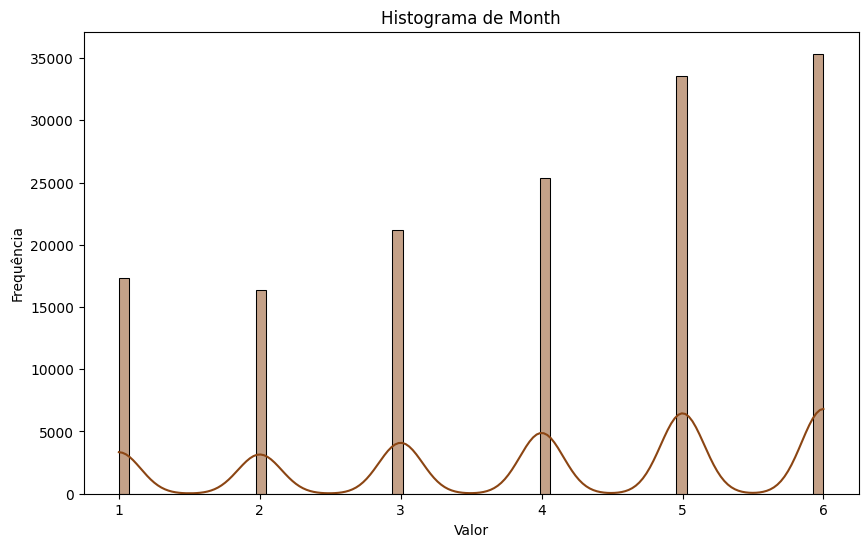

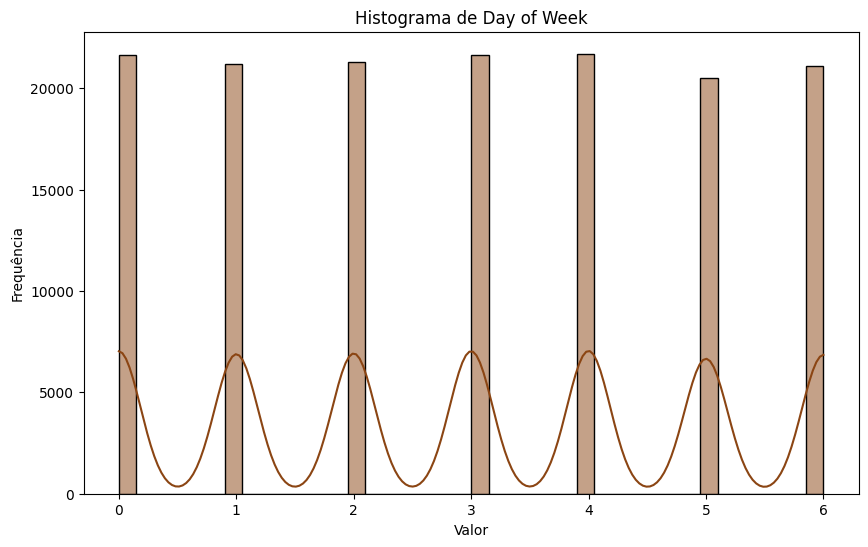

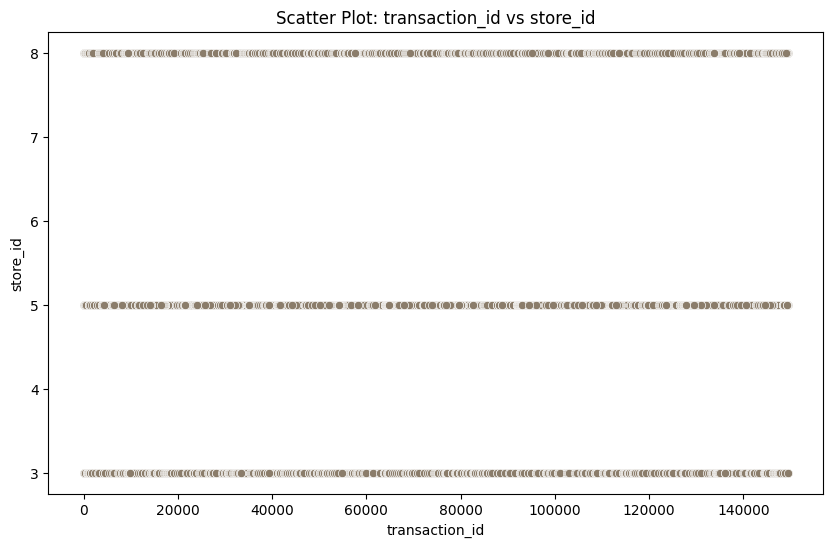

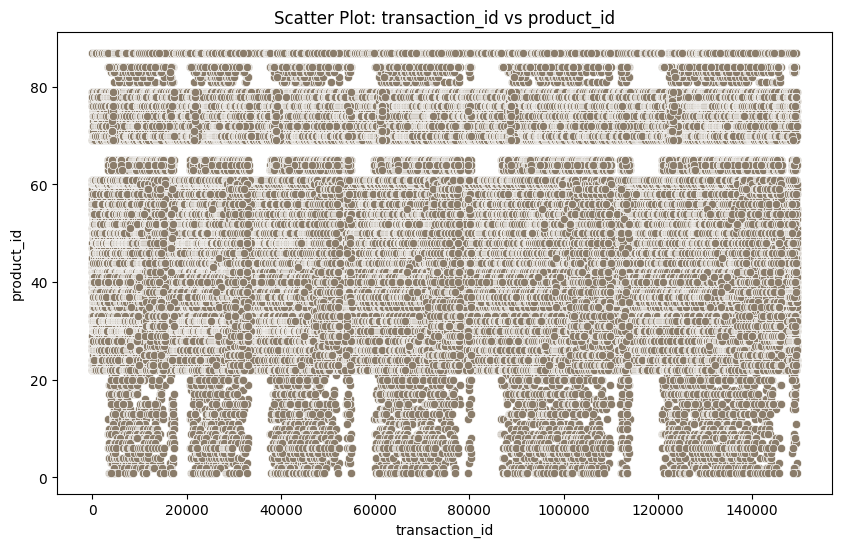

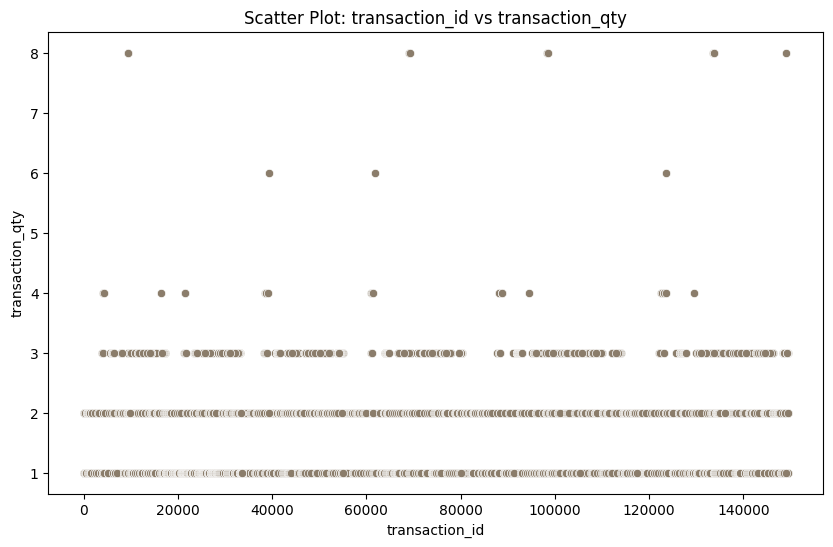

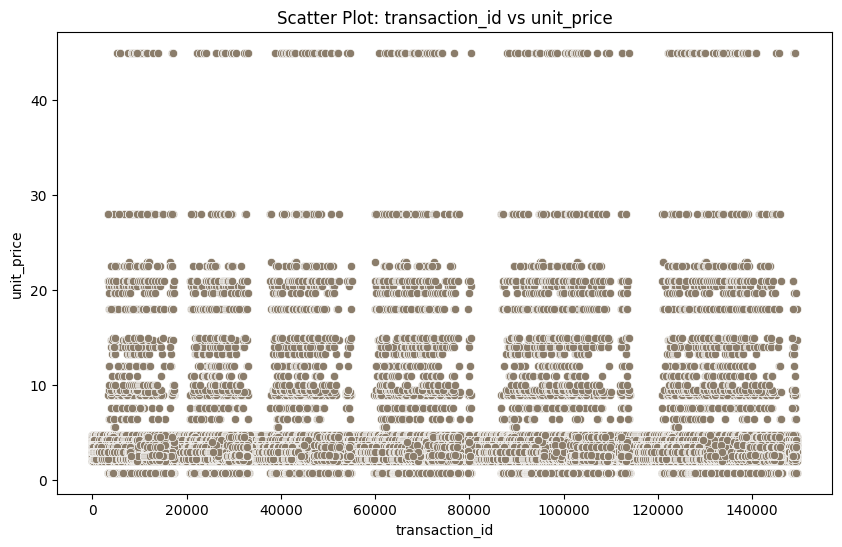

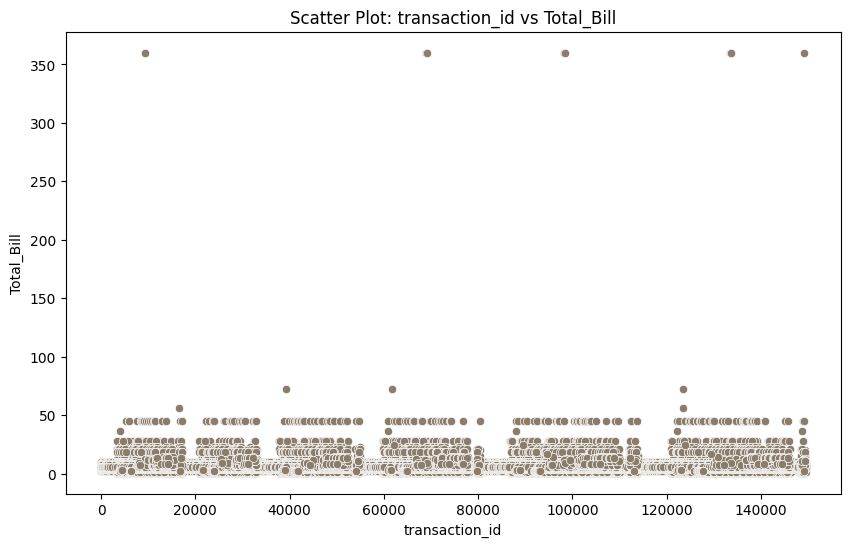

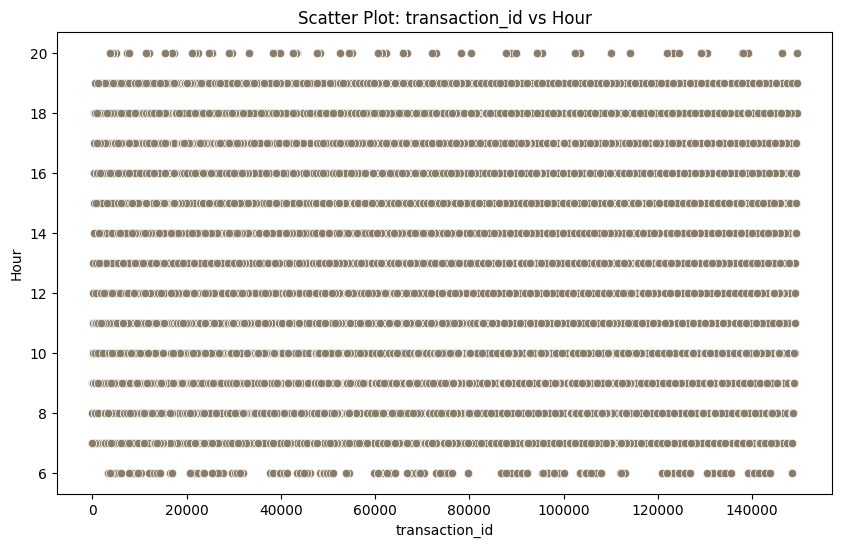

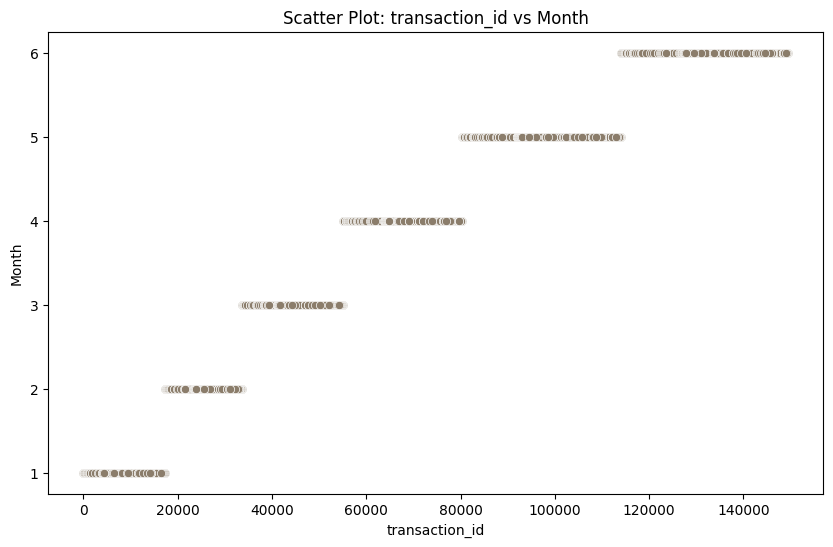

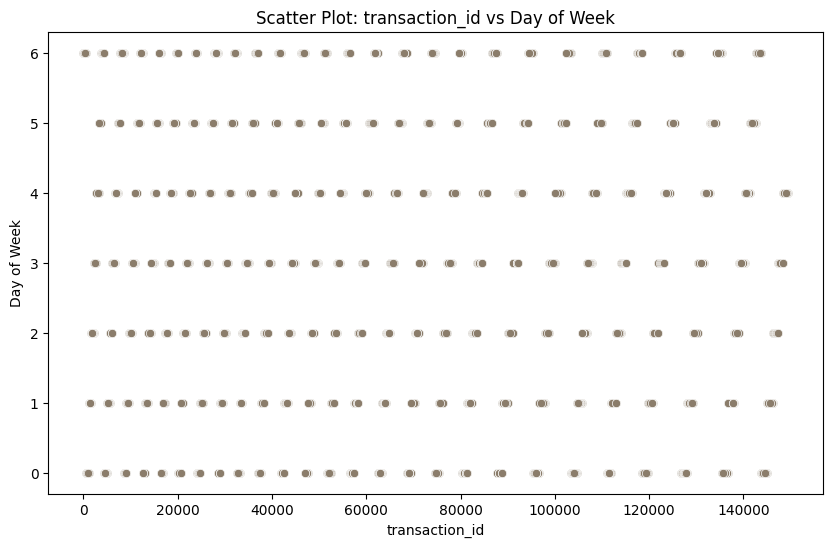

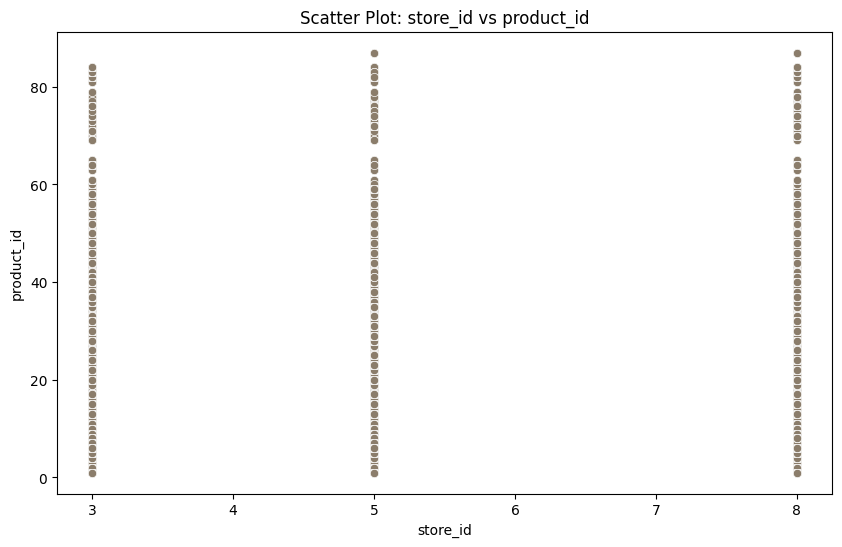

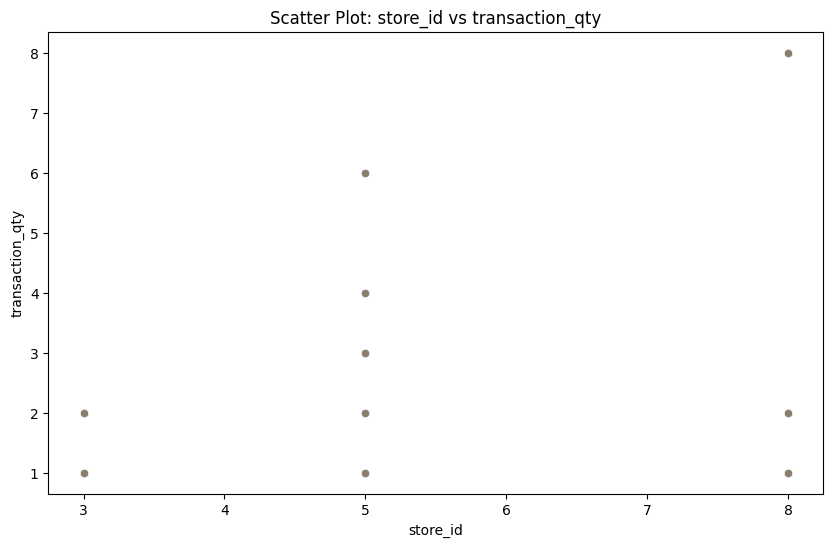

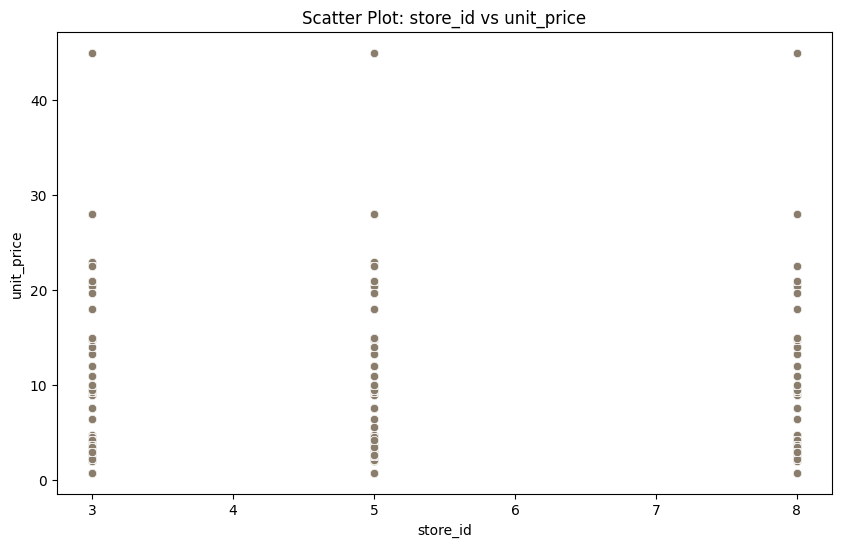

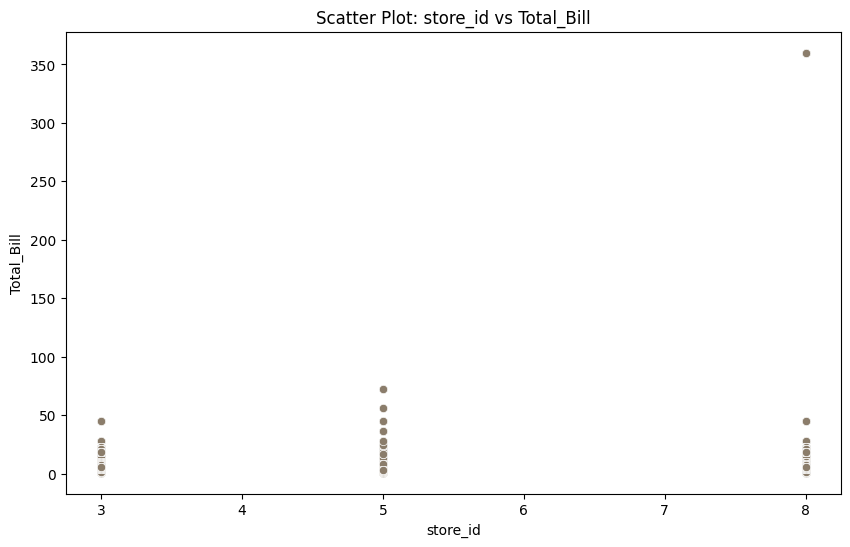

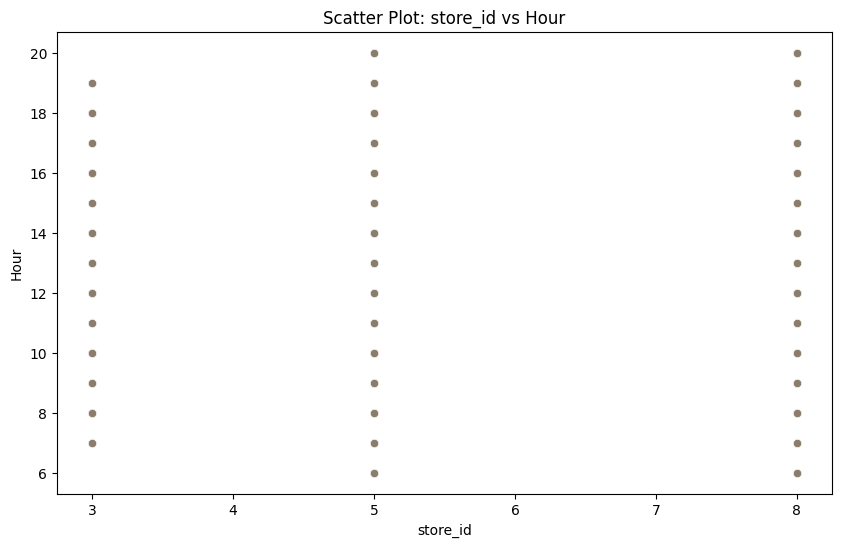

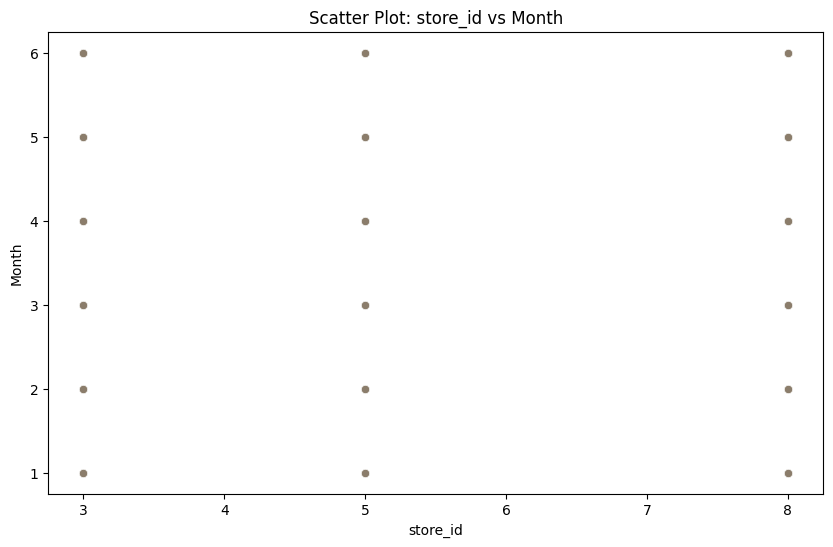

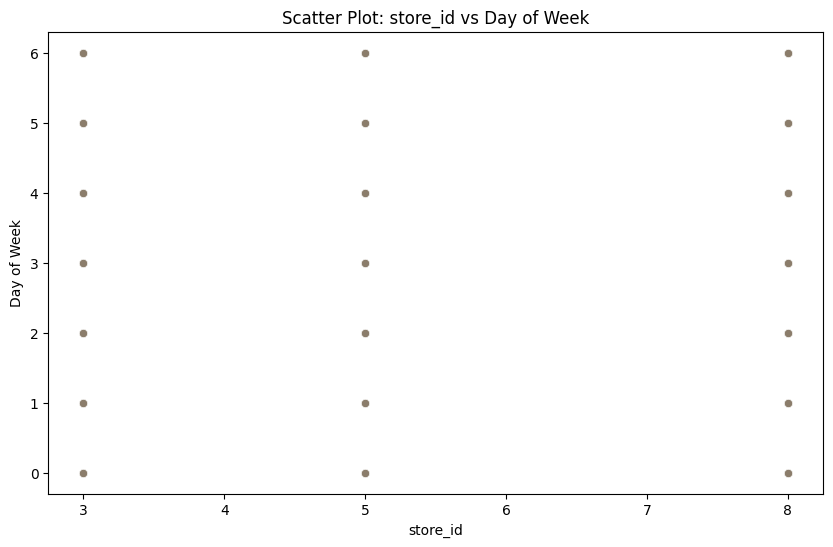

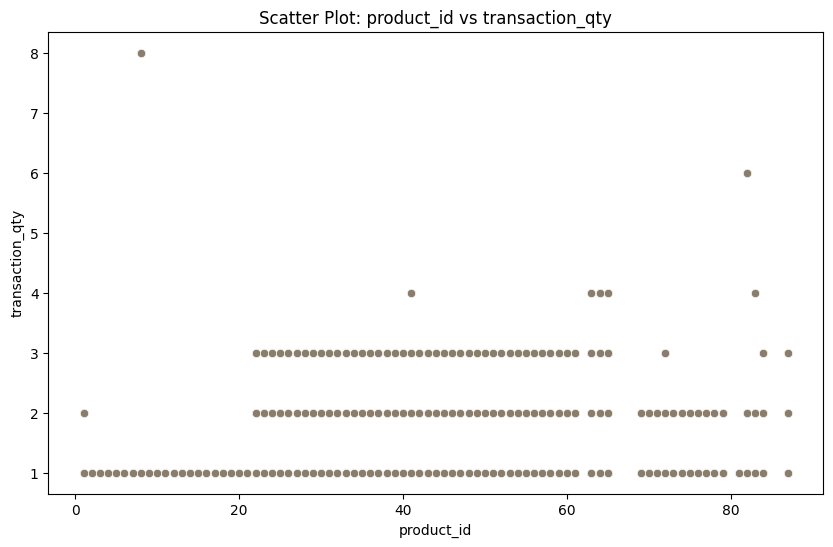

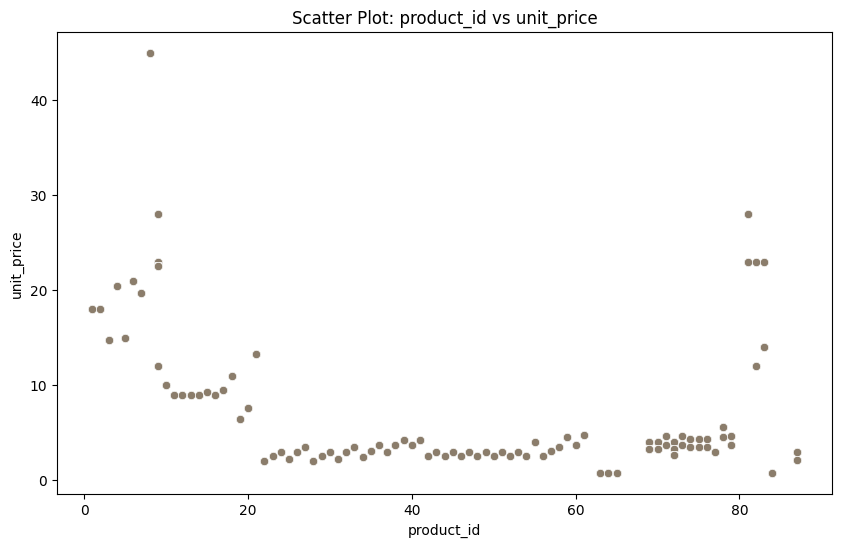

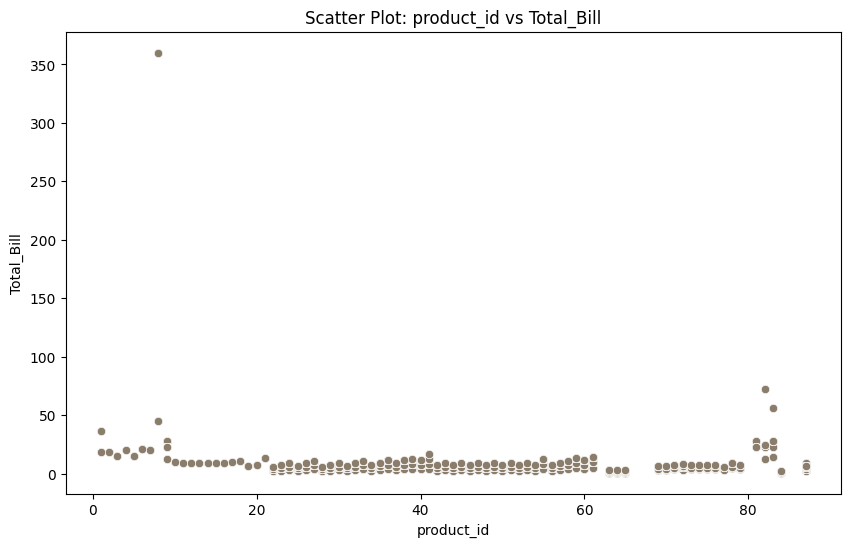

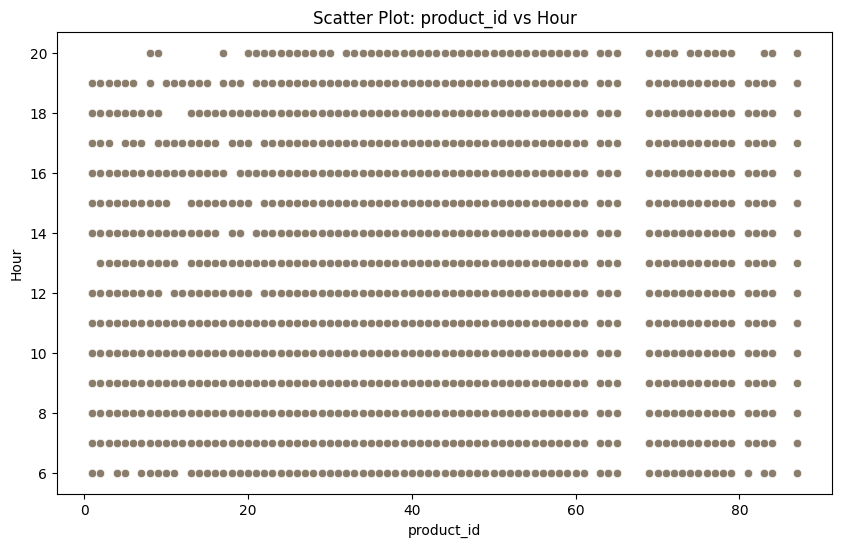

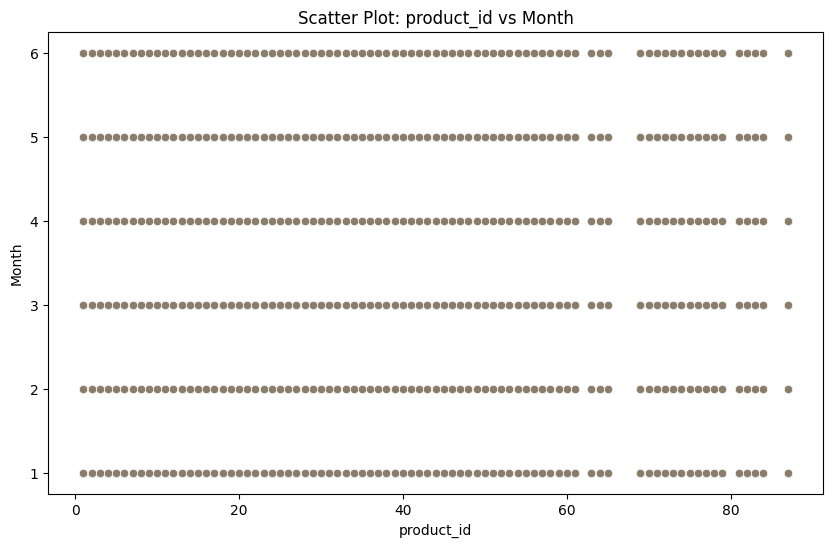

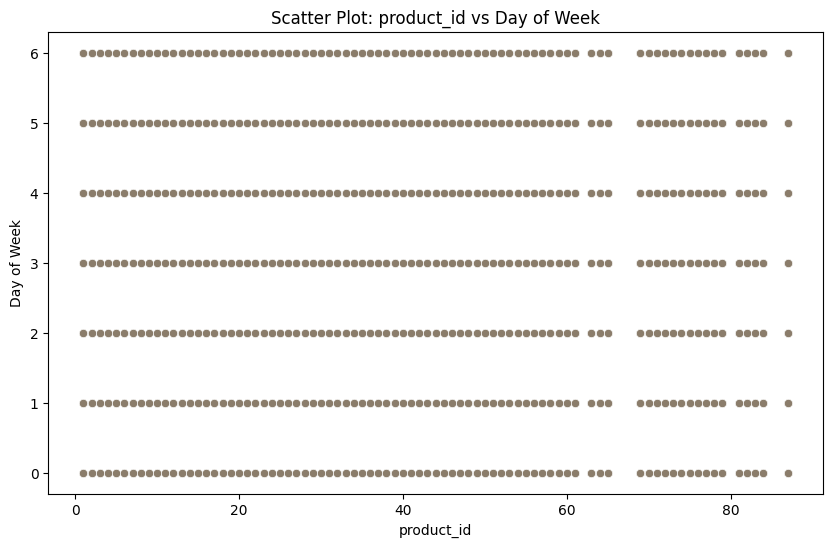

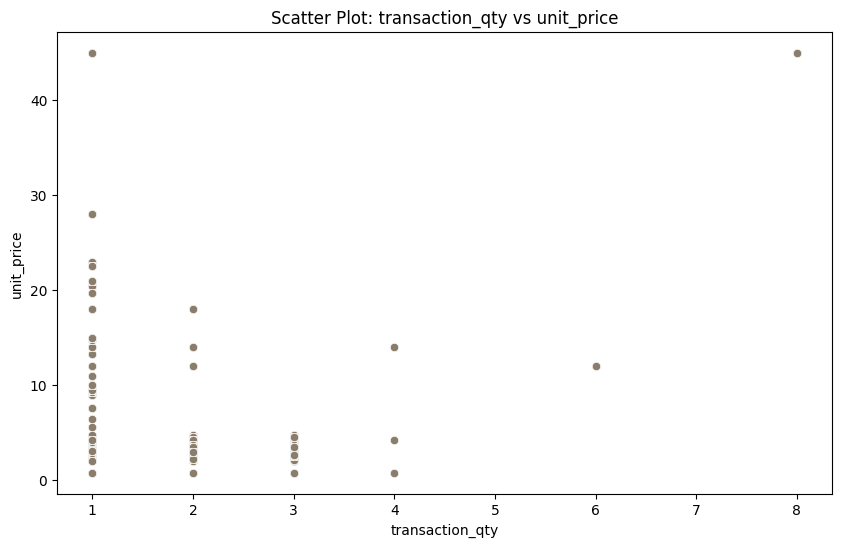

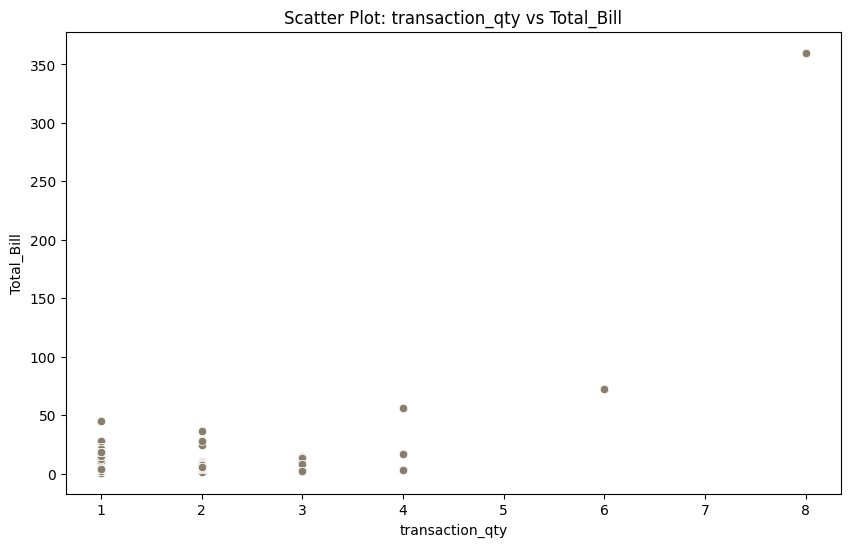

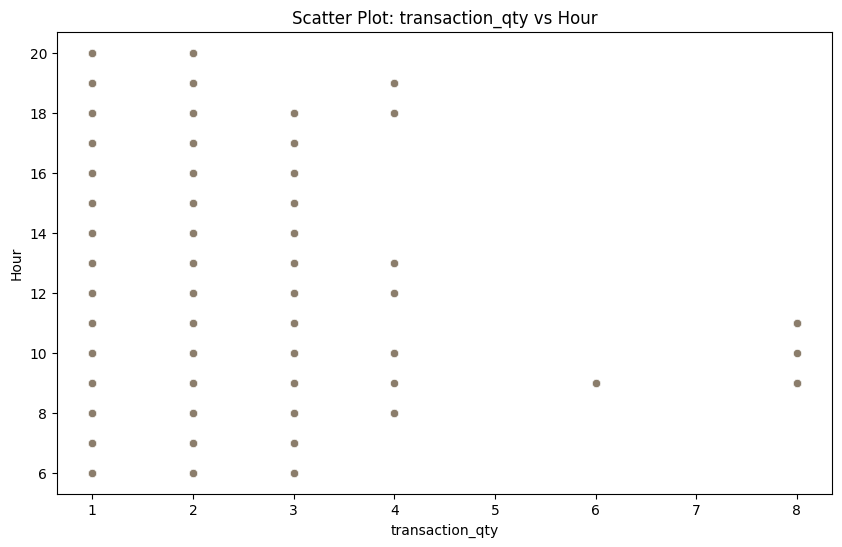

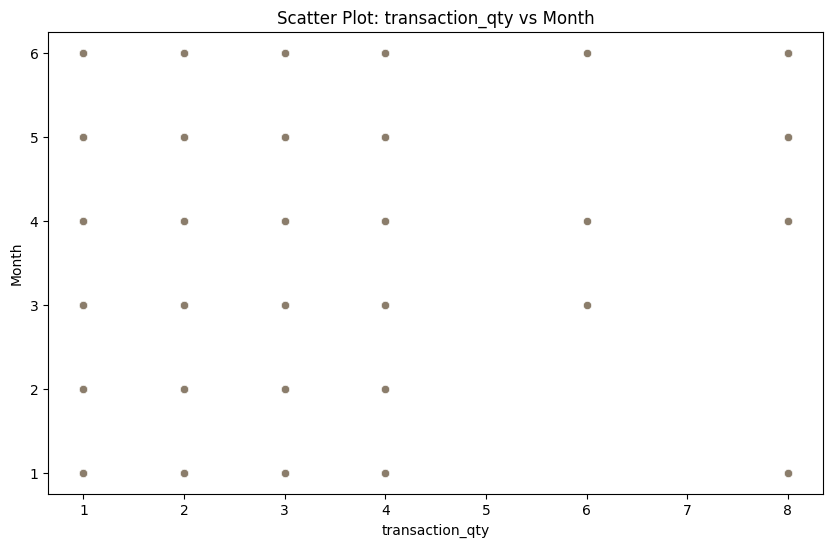

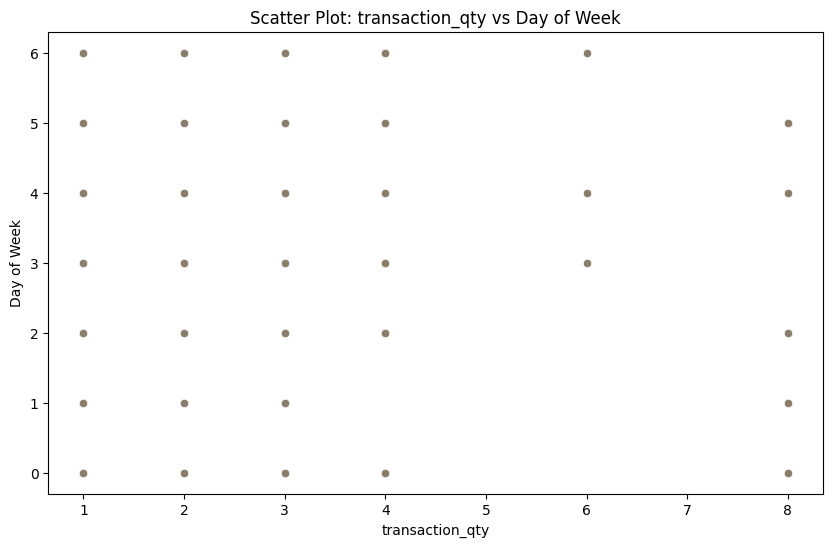

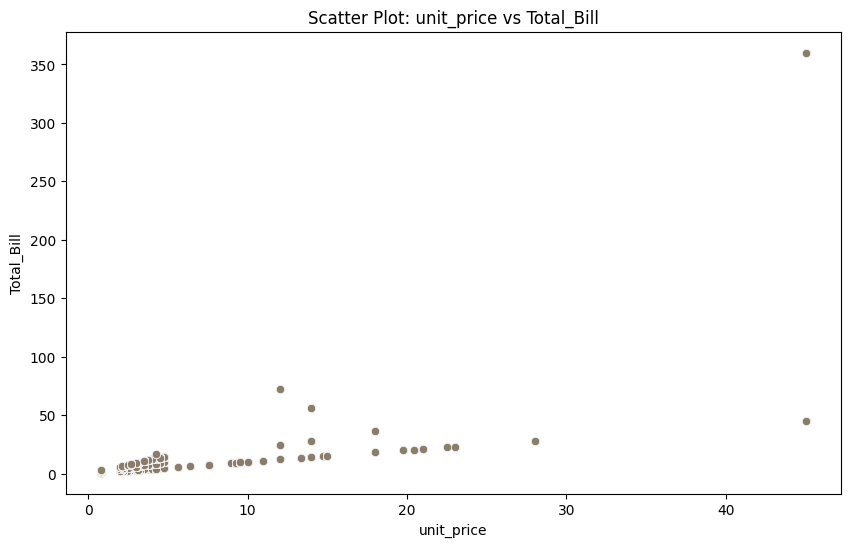

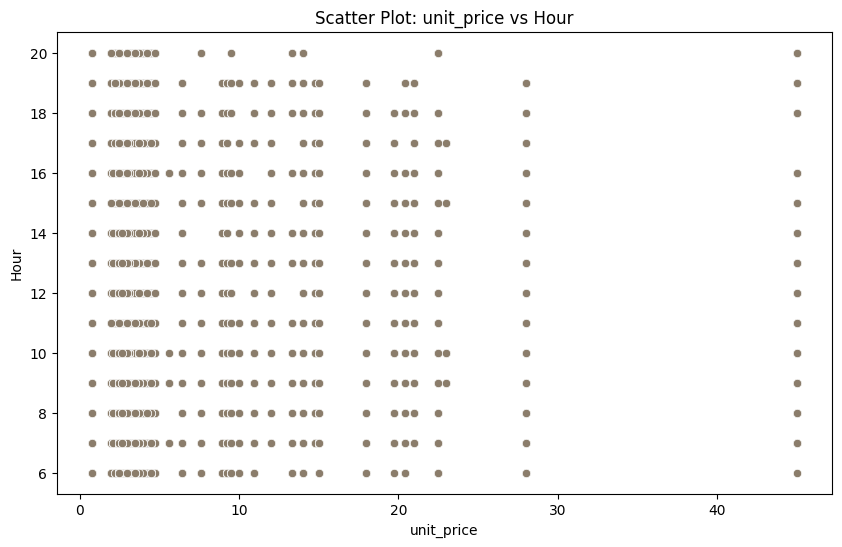

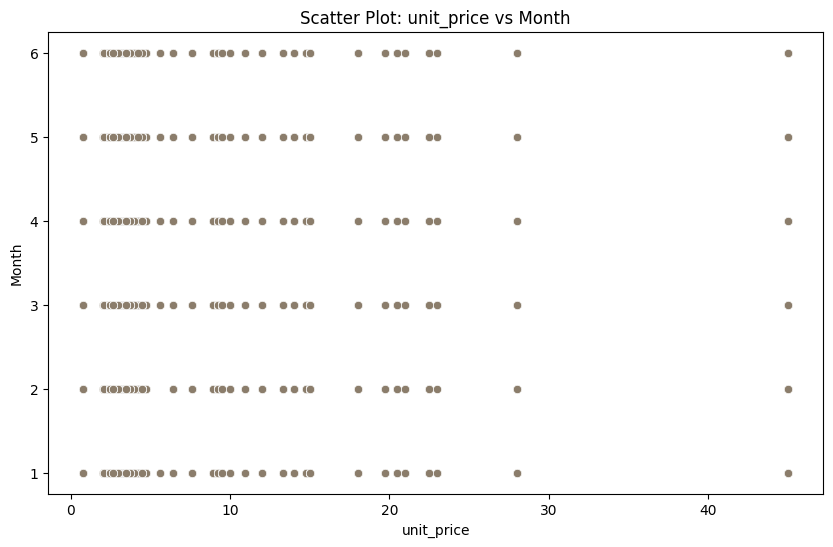

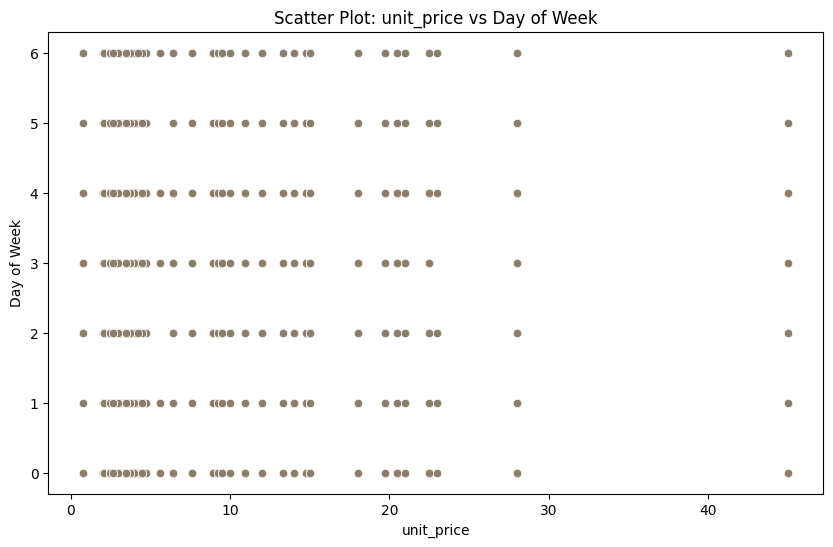

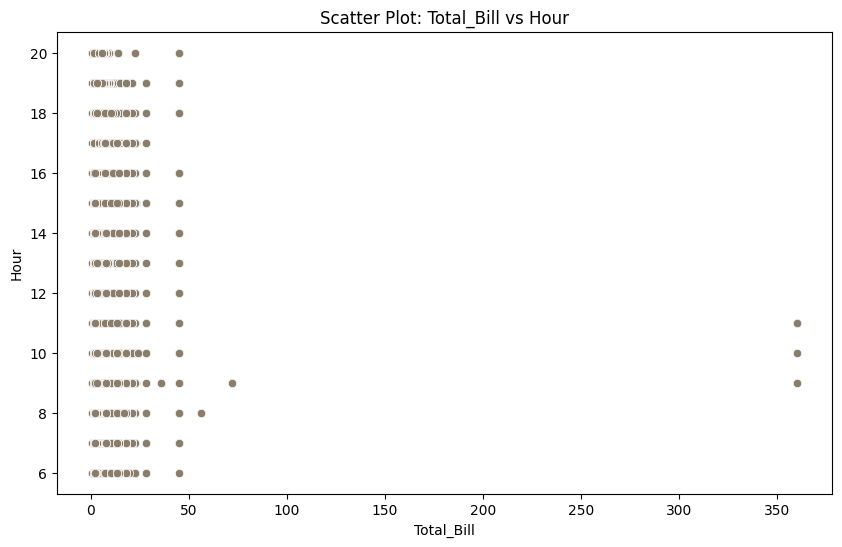

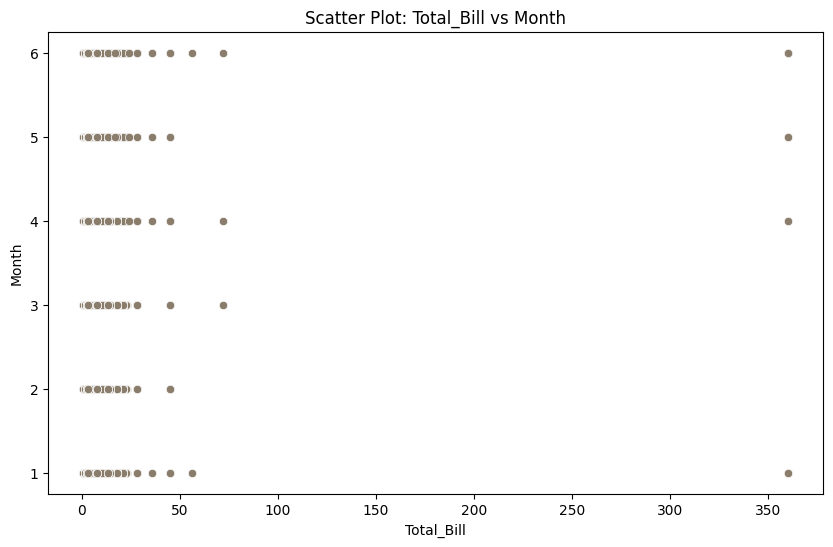

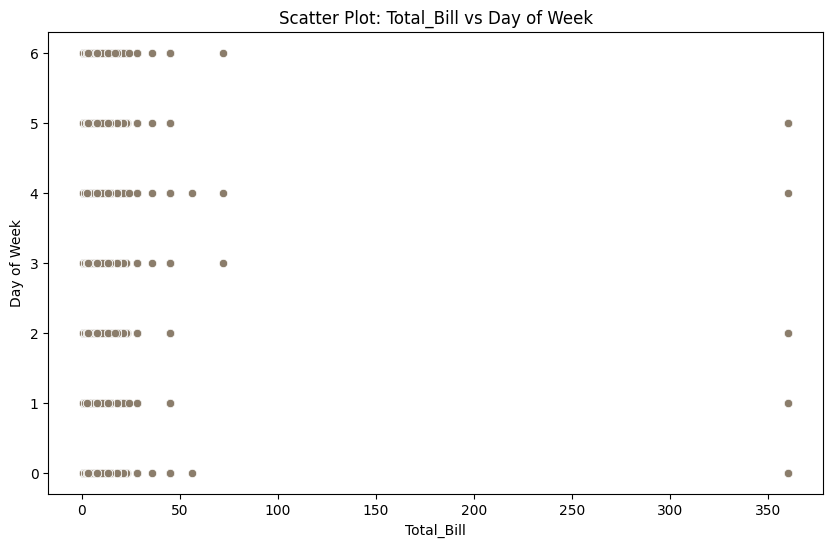

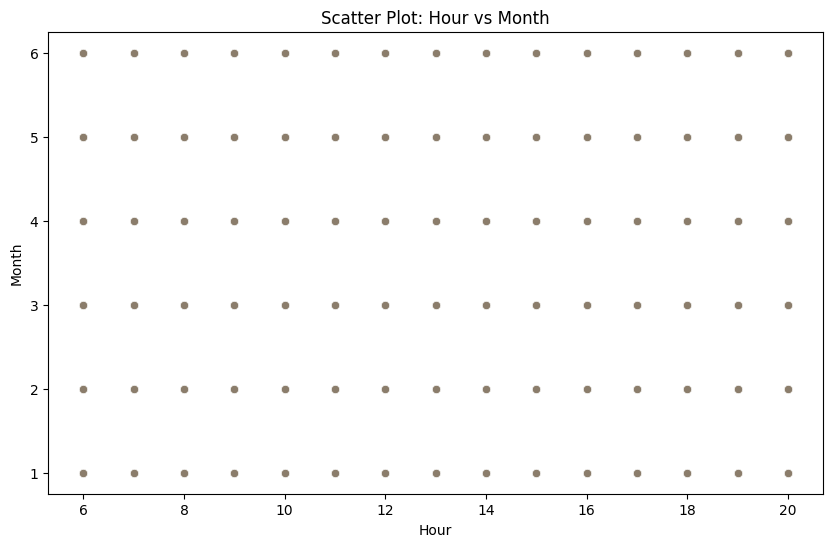

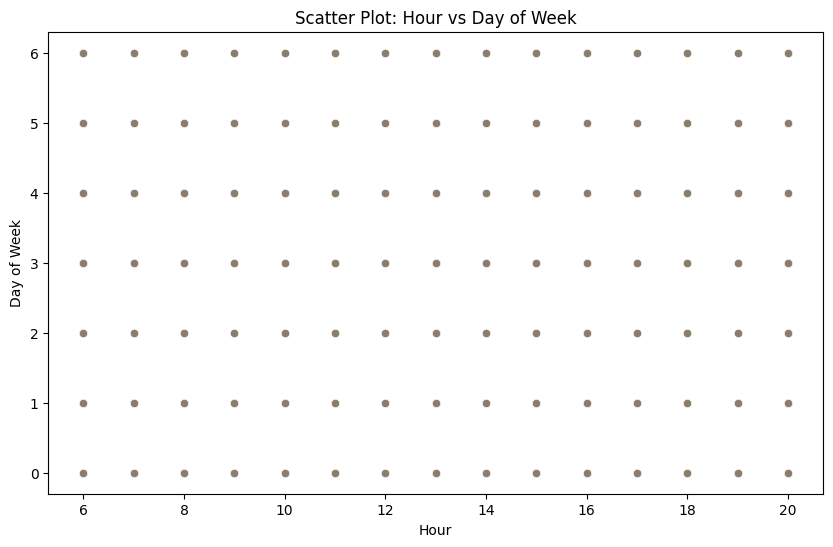

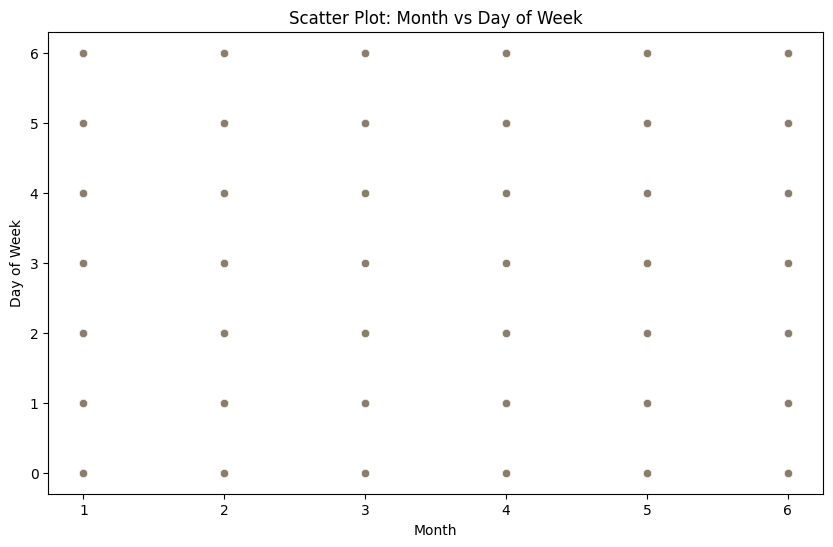

In [37]:
df = pd.read_csv('CoffeeshopData/Project.csv')

# Histograma
for column in df.select_dtypes(include=['float64', 'int64']).columns: # esta linha itera sobre cada coluna do Df
    plt.figure(figsize=(10, 6)) # cria uma nova figura matplot
    sns.histplot(data=df[column], kde=True, color='#8B4513') # cria um histograma usando sns para a coluna atual do df, com a opção de adicionar uma estimativa de densidade do kernel (kde)
    plt.title(f'Histograma de {column}') #
    plt.xlabel('Valor')
    plt.ylabel('Frequência')
    plt.show()

# Scatter plot (variáveis de interesse)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for i in range(len(numeric_columns)): # esta e a proxima linha criam dois loops aninhados que iteram sobre todas as combinações possíveis de pares de colunas numéricas do Df
    for j in range(i+1, len(numeric_columns)):
        plt.figure(figsize=(10, 6)) # cria uma nova figura matplotlib
        sns.scatterplot(x=numeric_columns[i], y=numeric_columns[j], data=df, color='#8B7D6B') # plota um gráfico de dispersão usando sns
        plt.title(f'Scatter Plot: {numeric_columns[i]} vs {numeric_columns[j]}') # definem o título, rótulo dos eixos x e y para o gráfico de dispersão
        plt.xlabel(numeric_columns[i])
        plt.ylabel(numeric_columns[j])
        plt.show() # mostra o gráfico

# Neste insight, estaremos analisando todos os dados captados e tratados do .csv do Dataset, trazendo todos os gráficos correspondentes abaixo

# **Analisando a Venda de Produtos Mais Populares por Categoria e Top 10 Tipos de Produtos**

*   Nesta análise, estaremos criando visualizações de dados sobre a venda dos produtos mais populares, separados por categoria, e o top 10 dos tipos de produtos mais vendidos.




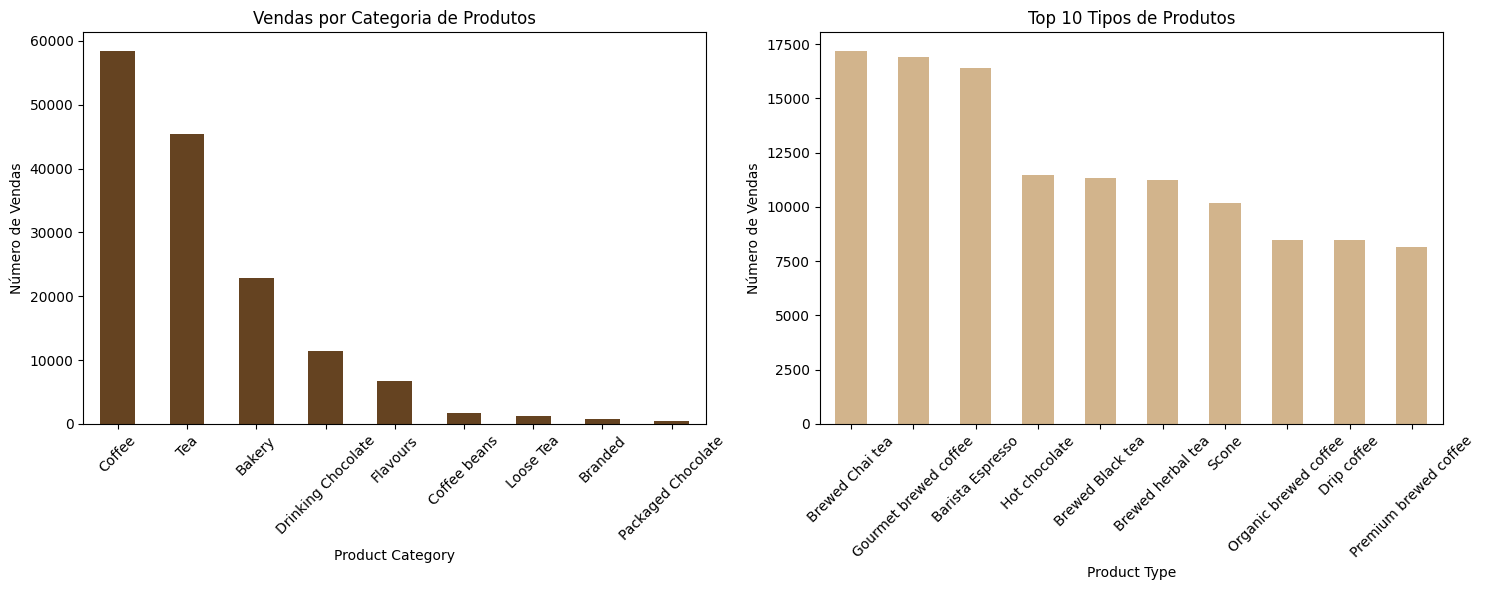

In [38]:
# Categorias de produtos mais populares
category_sales = df['product_category'].value_counts()

# Tipos de produtos mais populares
type_sales = df['product_type'].value_counts()

# Plot da análise de produtos
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
category_sales.plot(kind='bar', title='Vendas por Categoria de Produtos', xlabel='Product Category', ylabel='Número de Vendas', color='#654321')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
type_sales.head(10).plot(kind='bar', title='Top 10 Tipos de Produtos', xlabel='Product Type', ylabel='Número de Vendas', color='#D2B48C')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Insights**
*   **Vendas por Categoria de Produtos**:                             O gráfico à esquerda mostra o número de vendas entre as diferentes categorias de produtos, deixando claro as categorias mais populares. Podemos verificar que o café é a categoria mais popular e consequentemente a mais vendida.

*   **Top 10 Tipos de Produtos**: O gráfico à direita destaca os 10 tipos de produtos mais vendidos. Essa análise revela itens específicos, podendo ser importante para o gerenciamento de estoque e estratégias de marketing voltadas a esses produtos.



# Analisando a Venda de Produtos por Localidade

*   Neste insight, estaremos analisando a venda de produtos por localidade - no caso, vendas por localidade, mostrando a localização das lojas.

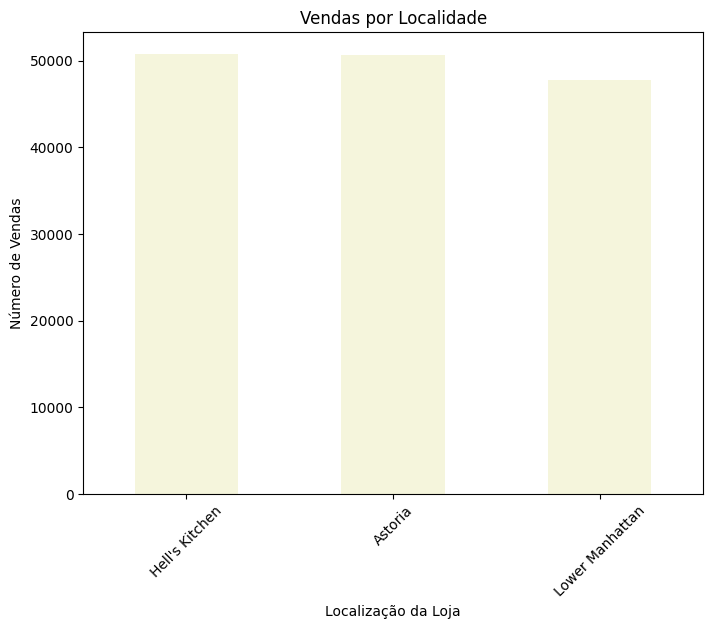

In [39]:
# Vendas por localidade
store_sales = df['store_location'].value_counts()

# Plot da análise de lojas
plt.figure(figsize=(8, 6))
store_sales.plot(kind='bar', title='Vendas por Localidade', xlabel='Localização da Loja', ylabel='Número de Vendas', color='beige')
plt.xticks(rotation=45)

plt.show()

**Insights**
*   O gráfico ilustra a distribuição de vendas por diferentes localizações de lojas, evidenciando que alguns locais tem volumes de vendas significativamente maiores. Podemos atribuir que as vendas em determinadas localizações são maiores por fatores como acessibilidade, demografia local, tamanho, e claro, a popularidade da localização - podemos visualizar no gráfico que as maiores vendas estão em Hell's Kitchen e Astoria.




# **Conclusão**
---
Criamos um overview dos dados, coletarmos estatísticas, limpamos e preparamos os dados, criamos um histograma e um scatter plot completo e também criamos alguns insights dos dados coletados do dataset para ampliar nossos conhecimentos referente ao exercício proposto. Desta forma, acreditamos que contemplamos todos os requisitos propostos no CP.

